# Multivariate Normal Distribution

Recall that a random vector $X = (X1,...,X_d)$ has a multivariate normal (or Gaussian) distribution if every linear combination

$$\sum_{i=1}^d{a_iX_i}, \quad a_i \in \mathbb{R}$$

is normally distributed.

The multivariate normal distribution has a joint probability density given by

$$p(x|m,K_0) = (2\pi)^{-d/2}|K_0|^{-1/2}\exp{\left(-\frac{1}{2}(x-m)^TK_0^{-1}(x-m)\right)}$$

where $m \in \mathbb{R}^d$ is the mean vector and $K_0 \in M_d{\mathbb{R}}$ is the (symmetric, positive definite) covariance matrix.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Set parameters

In [3]:
# Define dimension
d = 2

# Set mean vector
m = np.array([1,2]).reshape(2, 1)

# Set covariance function
K_0 = np.array([[2, 1],
              [1, 2]])

Let's us compute the eignvalues of $K_0$

In [4]:
np.linalg.eigvals(K_0)

array([3., 1.])

We see that $K_0$ is indeed positive definite.

# Sampling process

## Step 1: Compute the Cholesky Decomposition

We want to compute the Cholesky decomposition of the covariance matrix $K_0$. That is, we want to find a lower triangular matrix $L \in M_d(\mathbb{R})$ such that $K_0 = LL^T$.

_"In practice it may be necessary to add a small multiple of the identity matrix I to the covariance matrix for numerical reasons. THis is because the eignvalues of the matrix $K_0$ can decay very rapidly and without this stabilization the Cholesky decomposition fails. The effect on the generated samples is to add additional independent noise of variance $\epsilon$. From the context $\epsilon$ can usually be chosen to have inconsequential effects on the samples, while ensuring numerical stability."_

In [5]:
# Define epsilon
epsilon = 0.0001

# Add small perturbation
K = K_0 + epsilon*np.identity(d)

# Cholesky decomposition
L = np.linalg.cholesky(K)
L

array([[1.41424892, 0.        ],
       [0.7070891 , 1.2247959 ]])

Let's verify the desired property:

In [6]:
np.dot(L, np.transpose(L))

array([[2.0001, 1.    ],
       [1.    , 2.0001]])

## Step 2: Generate Independent Samples $u \sim N(0, I)$

In [7]:
# Number of samples
n = 10000

u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

In [16]:
y

array([[-0.13973666, -0.25653674, -2.31180254,  0.66512936, -2.41577328,
        -1.05016128, -0.2060651 , -1.89463288, -0.99203151,  0.83642052,
        -0.09990854, -0.10374076,  2.07595023,  1.60844712, -0.99828925,
         1.51044254, -0.77379085, -0.45627961, -1.16042524, -0.51613431]])

## Step 3: Compute $x = m + Lu$

The variable $x = m + Lu$ has a multivariate normal distribution since it is a linear combination of independent normally distributed variables. Moreover,

$$E[x] = E[m + Lu] = m + LE[u] = m$$

and

$$E[xx^t] = E[mm^t] + E[mu^TL^T] + E[Lum^T] + E[uu^TL^T] = ||m^2|| + K$$

hence, $E[(x-m)(x^T-m^T)]=K$

In [10]:
x = np.dot(L,u)

# Plot distribution

Let's plot the density function.

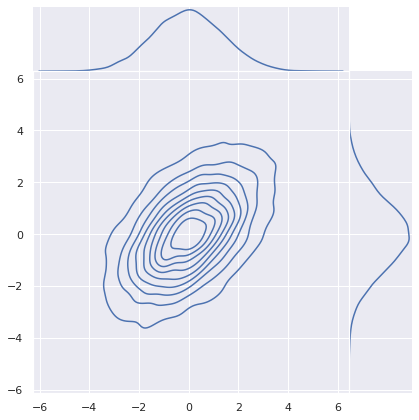

In [12]:
sns.jointplot(x=x[0],
             y=x[1],
             kind='kde',
             space=0);

# Using Numpy sampler

In [13]:
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)

In [14]:
y = np.transpose(z)

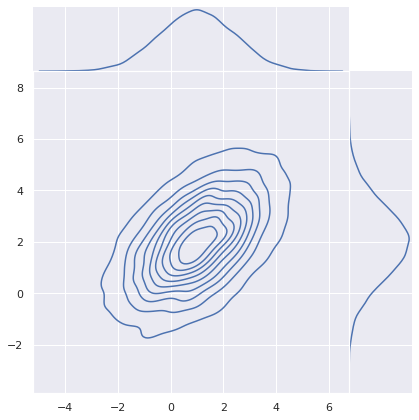

In [16]:
sns.jointplot(x=y[0],
             y=y[1],
             kind='kde',
             space=0);

# Sums of Normal Random Variables need not be Normal

As an important remark, note that sums of normal random variables not need to be normal. Let us see a concrete example. Let $Z_1 \sim \mathcal(0,1)$ and define $Z_2 := sign(Z)Z_1$. Then, $Z_1 + Z_2$ is not normally distributed.

In [17]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)
z_2 = np.sign(z)*z_1

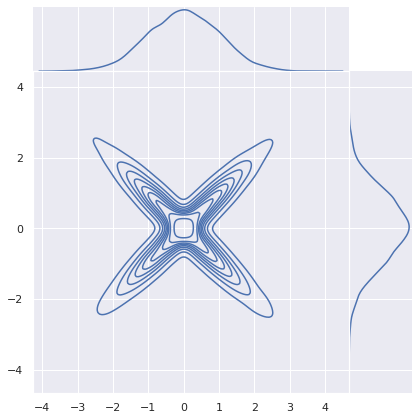

In [19]:
sns.jointplot(x=z_1,
              y=z_2, 
              kind="kde", 
              space=0);